In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')
data.rename(columns = {'IPG2211A2N':'sales'}, inplace = True)
train_data = data['1985':'2000']
test_data = data['2001':'2002']

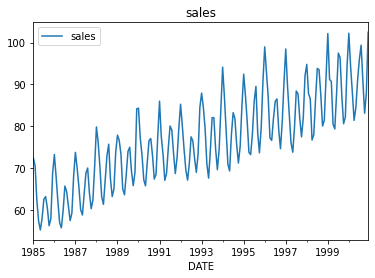

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES

train_data.plot(title = 'sales')

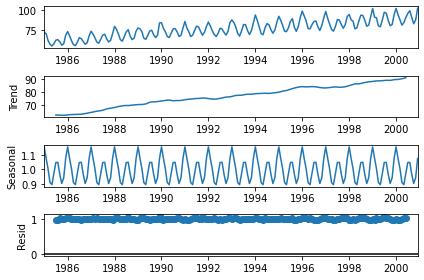

In [27]:
decompose_result = seasonal_decompose(train_data, model='multiplicative')
decompose_result.plot()
plt.show()

In [28]:
import warnings 
warnings.filterwarnings("ignore")
single_smoothing = ES(train_data, trend = 'additive',seasonal = 'additive', seasonal_periods = 12).fit()
test_predictions = single_smoothing.forecast(24)

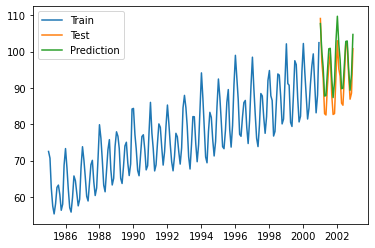

In [29]:
plt.plot(train_data,label = 'Train')
plt.plot(test_data,label = 'Test')
plt.plot(test_predictions,label = 'Prediction') 
plt.legend(loc = 'best')

In [30]:
from sklearn.metrics import mean_squared_error as mse
error = mse(test_data, test_predictions)
error

22.41311627666929